# Clifford Randomized Benchmarking (RB)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

## Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Randomized Benchmarking Configuration

NB: Clifford RB is executed by default with Interleaved RB !

In [4]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

/opt/anaconda3/envs/env-iqm-benchmarks/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
wrong_name_for_testing_EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[0,1],[3,4]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(6)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

## Run the experiment

In [6]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

NameError: name 'EXAMPLE_CRB' is not defined

## Perform the analysis

In [ ]:
result_clifford_rb = benchmark_clifford_rb.analyze()

2025-02-06 17:35:42,812 - iqm.benchmarks.logging_config - INFO - Post-processing sequential RB for qubits [[0, 1], [3, 4]]
2025-02-06 17:35:42,819 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 1
2025-02-06 17:35:42,825 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 3
2025-02-06 17:35:42,831 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 7
2025-02-06 17:35:42,837 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 15
2025-02-06 17:35:42,843 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 31
2025-02-06 17:35:42,849 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 63
2025-02-06 17:35:42,855 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 1
2025-02-06 17:35:42,861 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 3
2025-02-06 17:35:42,867 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 7
2025-02-06 17:35:42,873 - iqm.benchmarks.logging_config

In [ ]:
run_clifford_rb.dataset.attrs

{'session_timestamp': '20250206-173512',
 'execution_timestamp': '20250206-173512',
 'backend_configuration_name': 'fakeapollo',
 'backend_name': 'IQMFakeApolloBackend',
 'benchmark': 'clifford_rb',
 'shots': 256,
 'max_gates_per_batch': None,
 'calset_id': None,
 'routing_method': 'sabre',
 'physical_layout': 'fixed',
 'qubits_array': [[0, 1], [3, 4]],
 'sequence_lengths': [1, 3, 7, 15, 31, 63],
 'num_circuit_samples': 25,
 'parallel_execution': False,
 0: {'qubits': [0, 1],
  'depth_1': {'time_circuit_generation': 10.235624074935913,
   'time_submit': 0.007115840911865234,
   'time_retrieve': 0.0120849609375,
   'all_job_metadata': {'batch_job_1': {'job_id': '49dbc4e5-cb43-4be9-97bc-126e417b1432',
     'backend': 'aer_simulator',
     'status': 'job has successfully run',
     'circuits_in_batch': None,
     'shots': None,
     'timestamps': None}}},
  'depth_3': {'time_circuit_generation': 10.235624074935913,
   'time_submit': 0.03793978691101074,
   'time_retrieve': 0.0005171298980

In [ ]:
result_clifford_rb.observations

[BenchmarkObservation(name='avg_gate_fidelity', value=0.9474077775163571, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1]), uncertainty=0.0018815554299196127),
 BenchmarkObservation(name='avg_gate_fidelity', value=0.9427726727407686, identifier=BenchmarkObservationIdentifier(qubit_indices=[3, 4]), uncertainty=0.002363155806864545)]

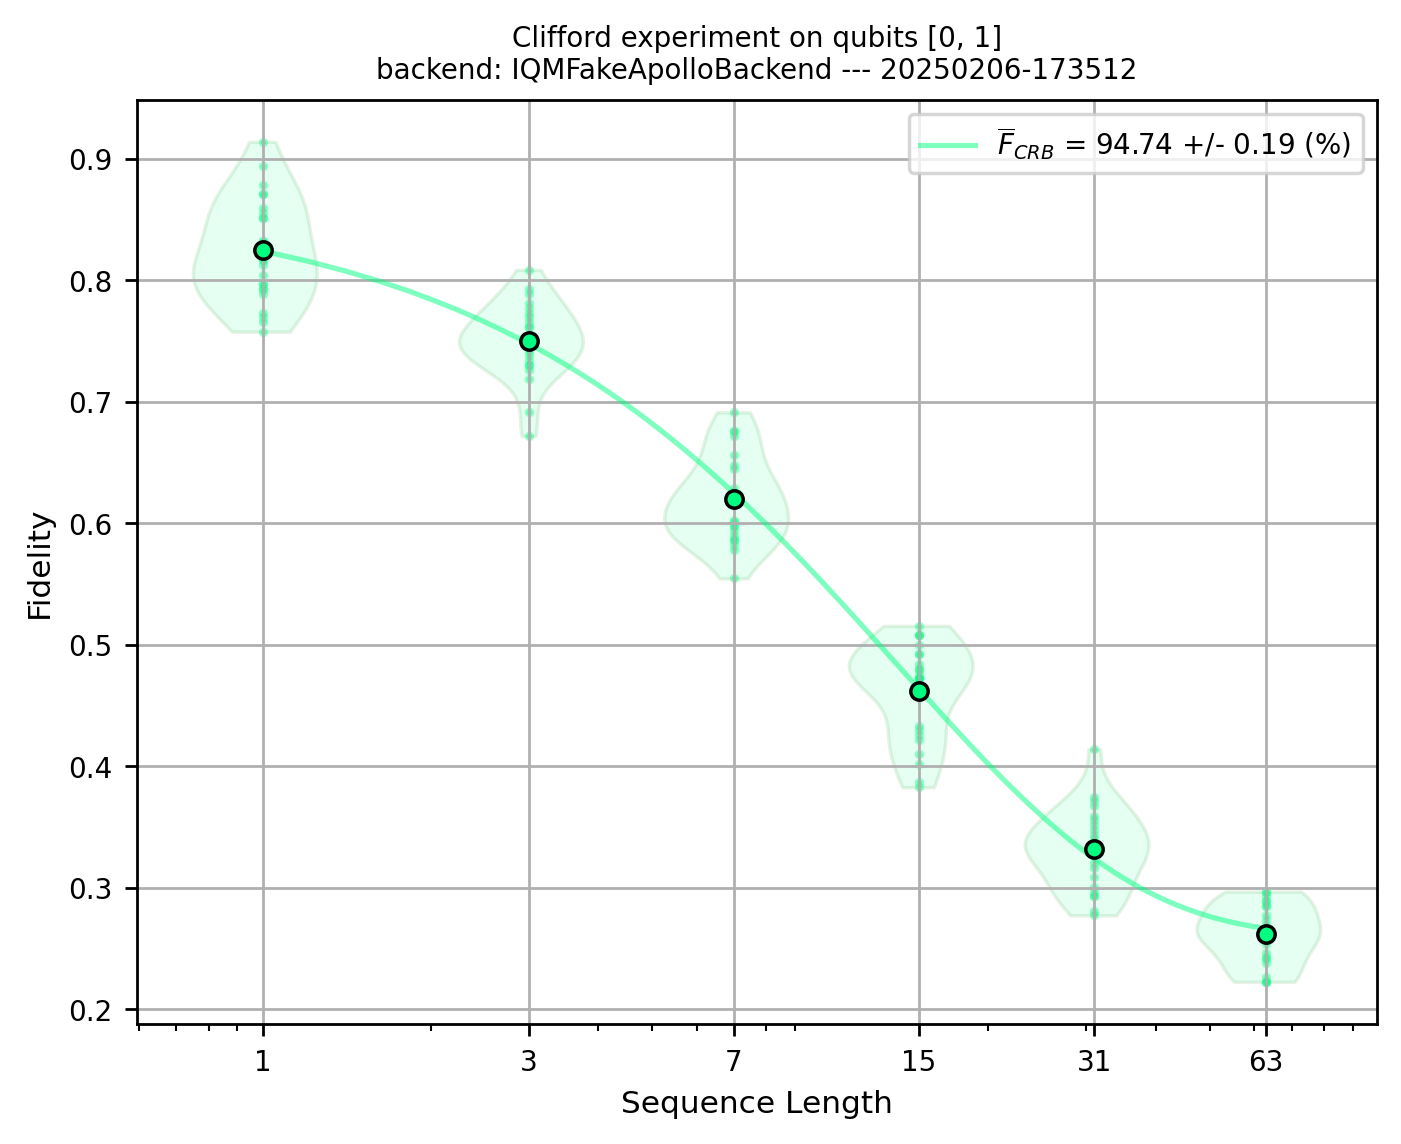

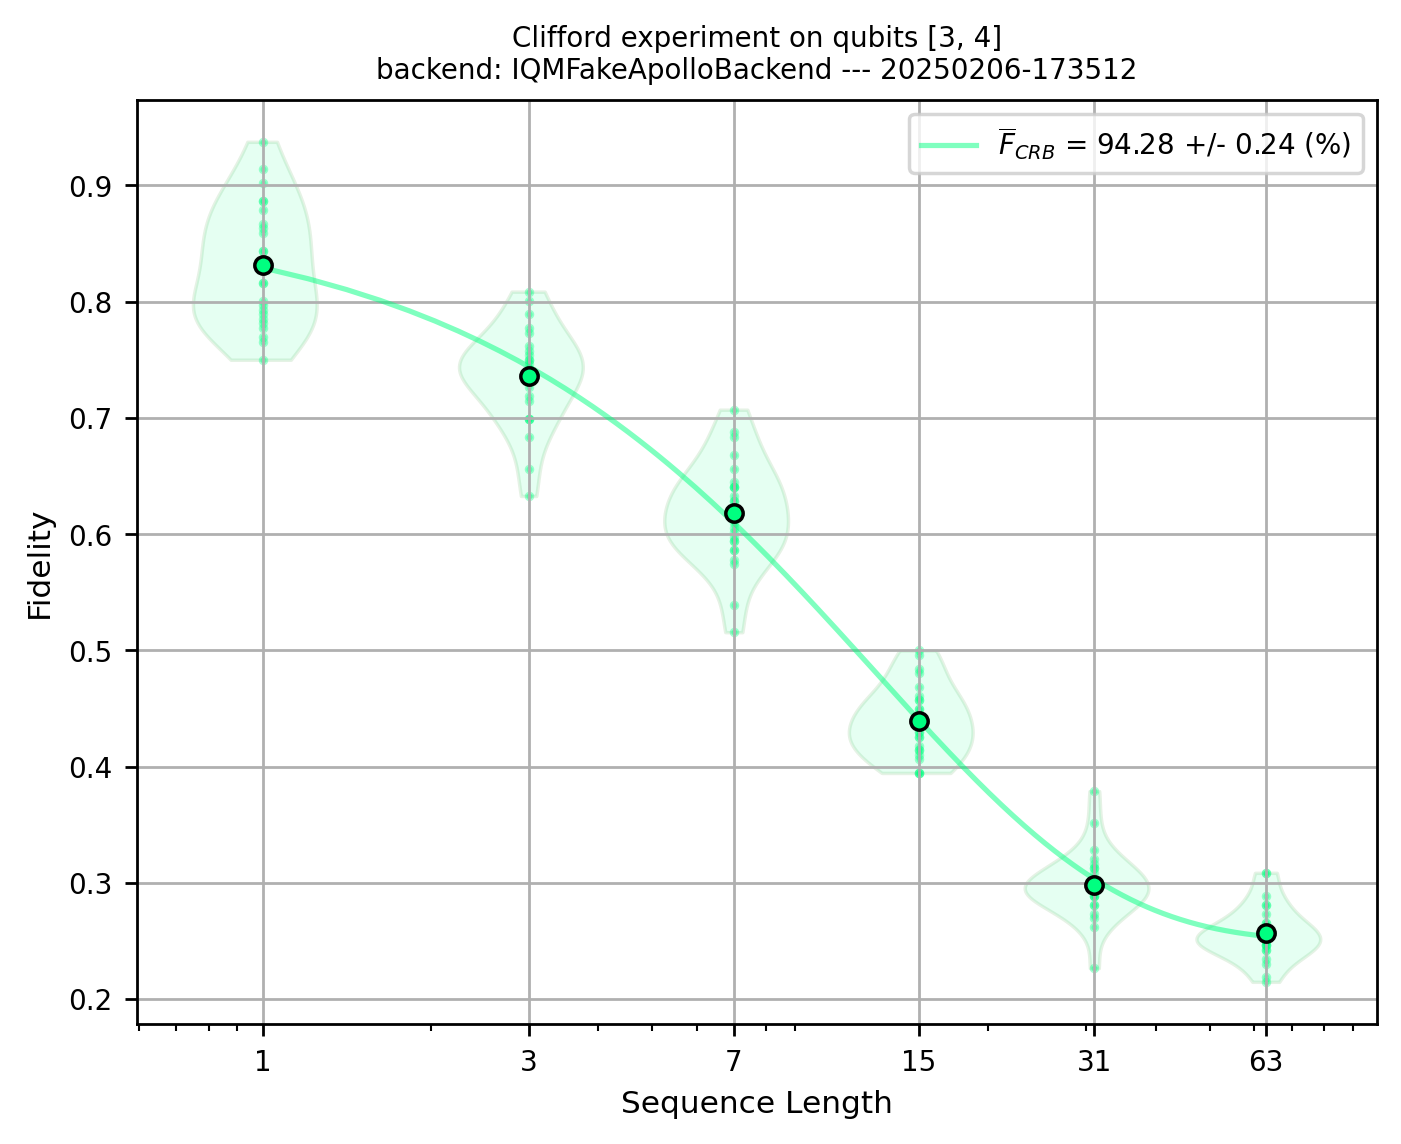

In [ ]:
for plot in result_clifford_rb.plots.values():
    display(plot)